In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [27]:
train_file = 'data/SENTIPOLC Sentiment Polarity Classification - Evalita 2016.csv'
test_file = 'data/test_set_sentipolc16_gold2000.csv'

## Load Train and Test Dataset

A single development set will be provided, [SentiDevSet](http://www.di.unito.it/~tutreeb/sentipolc-evalita16/sentipolc-guidelines2016UPDATED130916.pdf) henceforth. In particular, the distribution
consists of a set of 7,410 tweets, with IDs and annotations concerning all three Sentipolc’s
subtasks: 
- subjectivity classification (subj),
- polarity classification (opos and oneg) and 
- irony detection (iro).

In [28]:
df_test = pd.read_csv(test_file)
df_test.head()

,idtwitter,subj,opos,oneg,iro,lpos,lneg,top,text
0,507074506880712705,0,0,0,0,0,0,2,Tra 5 minuti presentazione piano scuola del go...
1,507075789456961536,1,1,0,0,1,0,2,@matteorenzi: Alle 10 appuntamento su http://t...
2,507077511902425088,1,0,1,0,0,1,2,#labuonascuola gli #evangelisti #digitali non ...
3,507079183315787777,0,0,0,0,0,0,2,Riforma scuola Tutto il discorso di Renzi su ...
4,507080190225563648,1,0,0,0,0,0,2,.@matteorenzi @MiurSocial #labuonascuola basta...


In [29]:
df_test.lneg.value_counts() / df_test.shape[0]

0    0.6795
1    0.3205
Name: lneg, dtype: float64

In [30]:
df_train = pd.read_csv(train_file)
df_train.head()

,idtwitter,subj,opos,oneg,iro,lpos,lneg,top,text
0,122449983151669248,1,0,1,0,0,1,1,Intanto la partita per Via Nazionale si compli...
1,125485104863780865,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà Mario Monti..."
2,125513454315507712,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà #editoriale..."
3,125524238290522113,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...
4,125527933224886272,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...


### Polarity Classification

The distribution of the opos and oneg shows that the tweets exhibit a mixed combination of sentiment, namely:
- 10: positive polarity
- 01: negative polarity
- 11: mixed polarity
- 00: no polarity

Thus we transform the dataset to represent the above classes:

/home/fabio/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


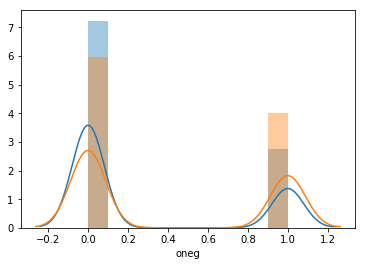

In [31]:
sns.distplot(df_train.opos)
sns.distplot(df_train.oneg)
plt.show()

In [32]:
print('OPS')
print(df_train.opos.value_counts() / df_train.shape[0])
print('ONEG')
print(df_train.oneg.value_counts() / df_train.shape[0])

OPS
0    0.723212
1    0.276788
Name: opos, dtype: float64
ONEG
0    0.597436
1    0.402564
Name: oneg, dtype: float64


The number of negative and positive tweets is equally distributed for the training and the test set.

In [33]:
columns = ['text', 'opos', 'oneg']
train_data_raw = df_train[columns].as_matrix()
test_data_raw = df_test[columns].as_matrix()

In [34]:
def combine_sentiment(data):
    for r in data:
        yield [r[0], str(r[1]) + str(r[2])]

In [35]:
train_data_raw = list(combine_sentiment(train_data_raw))
test_data_raw = list(combine_sentiment(test_data_raw))

In [36]:
print(train_data_raw[:2])
print(test_data_raw[:2])

[['Intanto la partita per Via Nazionale si complica. #Saccomanni dice che "mica tutti sono Mario #Monti" http://t.co/xPtNz4X7 via @linkiesta', '01'], ['False illusioni, sgradevoli realtà Mario Monti http://t.co/WOmMCITs via @AddToAny', '01']]
[['Tra 5 minuti presentazione piano scuola del governo #Renzi. #passodopopasso #labuonascuola Stay tuned', '00'], ["@matteorenzi: Alle 10 appuntamento su http://t.co/YphnXknDML #italiariparte #labuonascuola'  #Grandinsegnanti ... #Buonlavoro", '10']]


In [37]:
df_train_sentiment = pd.DataFrame(train_data_raw, columns=['text', 'sentiment'])
train_dist = df_train_sentiment['sentiment'].value_counts() / len(df_train_sentiment)
print('CLASS DISTRIBUTION')
train_dist

CLASS DISTRIBUTION


00    0.380027
01    0.343185
10    0.217409
11    0.059379
Name: sentiment, dtype: float64

In [38]:
df_test_sentiment = pd.DataFrame(test_data_raw, columns=['text', 'sentiment'])
test_dist = df_test_sentiment['sentiment'].value_counts() / len(df_test_sentiment)
print('CLASS DISTRIBUTION')
test_dist

CLASS DISTRIBUTION


00    0.457
01    0.367
10    0.158
11    0.018
Name: sentiment, dtype: float64

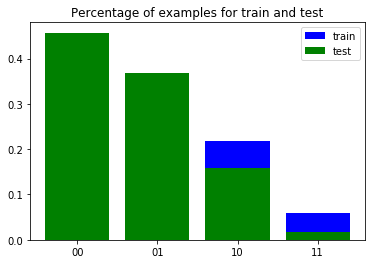

In [39]:
plt.figure(1)
ax = plt.subplot(111)
ax.bar(train_dist.index, train_dist, color = 'b', label= 'train')
ax.bar(test_dist.index, test_dist, color = 'g', label= 'test')
ax.legend(['train', 'test'])
plt.title('Percentage of examples for train and test')
plt.show()

take only positive and negatives

In [40]:
df_train_sentiment = df_train_sentiment[df_train_sentiment['sentiment'] != '11']
df_train_sentiment = df_train_sentiment[df_train_sentiment['sentiment'] != '00']
df_test_sentiment = df_test_sentiment[df_test_sentiment['sentiment'] != '11']
df_test_sentiment = df_test_sentiment[df_test_sentiment['sentiment'] != '00']

In [47]:
columns = ['text', 'sentiment']
train_data_raw = df_train_sentiment[columns].as_matrix()
test_data_raw = df_test_sentiment[columns].as_matrix()

In [48]:
print('train shape {}'.format(train_data_raw.shape))
print('test shape {}'.format(test_data_raw.shape))

train shape (4154, 2)
test shape (1050, 2)


### Top Words for Class

- 10: positive polarity
- 01: negative polarity
- 00: no polarity

In [49]:
positive_train_text = ' '.join([x[0] for x in train_data_raw if x[1] == '10'])
negative_train_text = ' '.join([x[0] for x in train_data_raw if x[1] == '01'])

In [50]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [51]:
stop_words = set(stopwords.words('italian'))
stop_words = stop_words.union({'Monti', 'Mario'})

In [52]:
def draw_wordcloud(data, color = 'black'):
    cleaned_word = " ".join([word for word in data.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

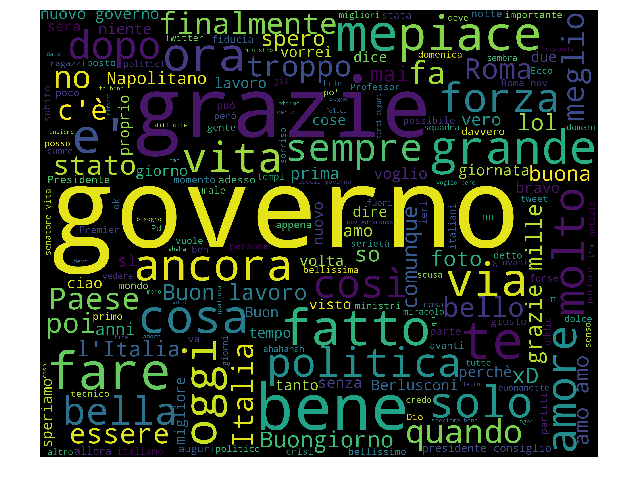

In [53]:
draw_wordcloud(positive_train_text)

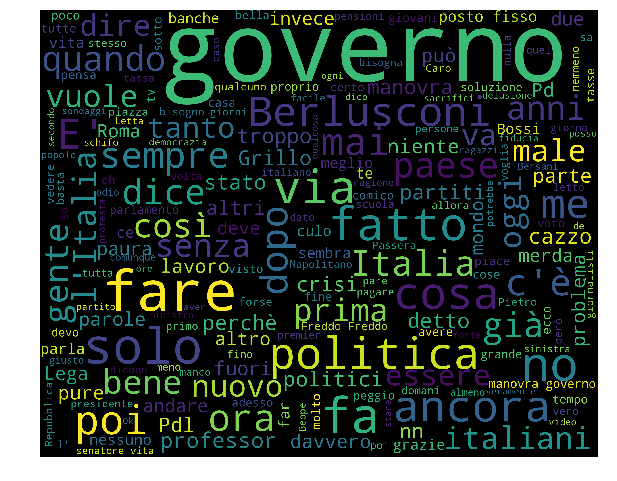

In [54]:
draw_wordcloud(negative_train_text)

## Data Preprocessing

We preprocess the tweets with [p/processor](https://github.com/s/preprocessor#available-options).
We replace URL, MENTION, HASHTAG, EMOJI, and NUMBER with keywords.
The list of positive and negative emoticons.

In [57]:
import preprocessor as p

# check the options at https://github.com/s/preprocessor#available-options
# p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.EMOJI, p.OPT.NUMBER, p.OPT.SMILEY)

In [58]:
smiley_pos = '$SMILEY_POS$'
smiley_neg = '$SMILEY_NEG$'

POSITIVE = {"*O", "*-*", "*O*", "*o*", "* *",
            ":P", ":D", ":d", ":p",
            ";P", ";D", ";d", ";p", 'xD',
            ":-)", ";-)", ":=)", ";=)",
            ":<)", ":>)", ";>)", ";=)",
            "=}", ":)", "(:;)",
            "(;", ":}", "{:", ";}",
            "{;:]",
            "[;", ":')", ";')", ":-3",
            "{;", ":]",
            ";-3", ":-x", ";-x", ":-X",
            ";-X", ":-}", ";-=}", ":-]",
            ";-]", ":-.)",
            "^_^", "^-^"}

NEGATIVE = {":(", ";(", ":'(",
            "=(", "={", "):", ");",
            ")':", ")';", ")=", "}=",
            ";-{{", ";-{", ":-{{", ":-{",
            ":-(", ";-(",
            ":,)", ":'{",
            "[:", ";]"
           }

In [59]:
def preprocess(data):
    """
    :data a list of tweets with their sentiment
    :return the tweets preprocessed and split by space
    """
    for text, sent in data:
        sentence = p.tokenize(text).split(' ')
        result = []
        for word in sentence:
            if word in POSITIVE:
                result.append(smiley_pos)
            elif word in NEGATIVE:
                result.append(smiley_neg)
            else:
                result.append(word)
        
        yield [sentence, sent]

In [60]:
train_data_preproccesed = list(preprocess(train_data_raw))
test_data_preprocessed = list(preprocess(test_data_raw))

In [61]:
print(train_data_preproccesed[18])
print(test_data_preprocessed[18])

[['Mario', '$HASHTAG$:', 'La', 'lira', 'non', 'era', 'una', 'moneta', 'strana,', 'ma', 'era', 'il', "più'", 'delle', 'volte', 'una', 'moneta', 'debole,', 'perche', 'rifletteva', 'caratteristiche', "dell'Italia"], '01']
[['$MENTION$', '$MENTION$', "e'", "l'espressione", 'della', 'delusione', 'su', 'proclami', 'e', 'parole', 'al', 'vento', 'sulla', 'soluz.', '$HASHTAG$.', 'Non', "e'$HASHTAG$"], '01']


Helper to find the tweet with positive and/or negative smiley. From the result we can see that there aren't so many.

In [62]:
def find_smiley(data, pos_or_neg):
    idx = []
    for i, x in enumerate(data):
        if len(set(pos_or_neg).intersection(set(x[0].split()))) > 0:
            idx.append(i)
    return idx

idx_pos = find_smiley(train_data_raw, POSITIVE)
idx_neg = find_smiley(train_data_raw, NEGATIVE)

print('number of positive {}'.format(len(idx_pos)))
print('number of negative {}'.format(len(idx_neg)))

number of positive 167
number of negative 19


In [63]:
for tweet, class_value in train_data_preproccesed[18:22]:
    print(tweet, class_value)

['Mario', '$HASHTAG$:', 'La', 'lira', 'non', 'era', 'una', 'moneta', 'strana,', 'ma', 'era', 'il', "più'", 'delle', 'volte', 'una', 'moneta', 'debole,', 'perche', 'rifletteva', 'caratteristiche', "dell'Italia"] 01
['Mario', 'Monti', 'a', 'Berlusconi,', "l'euro", 'non', 'è', 'in', 'crisi:', 'ROMA,', '$NUMBER$', 'OTT', '?', "''L'euro", 'non', 'è', 'in', "crisi'',", "''è", 'stabile', 'in', 'termin...', '$URL$'] 10
['Un', 'parere', 'autorevole', 'e', 'non', 'demagogico', "sull'euro", 'da', 'mario', 'monti', '$URL$'] 10
['Ma', 'quanto', 'ce', 'vuole', 'affinchè', 'Mario', 'Monti', 'arrivi', 'a', 'Palazzo', 'Chigi?', 'Sarà', 'impanicato', 'nel', 'traffico', 'festivo', 'del', 'ponte?'] 01


In [64]:
x_train = np.array([s for s, _ in train_data_preproccesed])
y_train = np.array([c for _, c in train_data_preproccesed])

x_test = np.array([s for s, _ in test_data_preprocessed])
y_test = np.array([c for _, c in test_data_preprocessed])

### Save the dataset

finally, we save the dataset an np compressed array

In [65]:
np.savez_compressed('data/sentipolc.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [66]:
x_train

array([list(['Intanto', 'la', 'partita', 'per', 'Via', 'Nazionale', 'si', 'complica.', '$HASHTAG$', 'dice', 'che', '"mica', 'tutti', 'sono', 'Mario', '$HASHTAG$"', '$URL$', 'via', '$MENTION$']),
       list(['False', 'illusioni,', 'sgradevoli', 'realtà', 'Mario', 'Monti', '$URL$', 'via', '$MENTION$']),
       list(['False', 'illusioni,', 'sgradevoli', 'realtà', '$HASHTAG$', 'di', 'Mario', 'Monti', 'sul', 'Corriere', 'della', 'Sera:', '$URL$', '$HASHTAG$', 'stampa']),
       ...,
       list(['$MENTION$', 'Consolati,', 'il', 'governo', '$HASHTAG$', 'ha', 'messo', 'una', 'tassa', 'sulla', 'fortuna.', 'Te', 'non', 'la', 'pagherai', 'mai.', '$MENTION$', 'grazie', 'per', "l'aiuto", 'fratello!']),
       list(['$MENTION$', 'beh,', 'beate', 'loro!', 'Io', 'nn', 'possiedo', 'nulla', 'di', 'tutto', 'ciò..', 'Devo', 'preoccuparmi?!', '$HASHTAG$']),
       list(['Caro', '$HASHTAG$,se', '$HASHTAG$', 'spaccava', 'i', 'computer', 'e', 'ora', 'è', 'il', 'blogger', 'più', 'seguito,forse', 'è', 'più', 

In [67]:
x_train_text = [' '.join(text) for text in x_train]
x_test_text = [' '.join(text) for text in x_test]

### Encode the Dataset into Sequence of IDs per Word

prepare the dataset into a sequence of words and generate a dictionary that maps word to index

In [68]:
from keras.preprocessing.text import Tokenizer
from collections import OrderedDict

/home/fabio/miniconda3/envs/dl/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [69]:
word_tokenizer = Tokenizer(oov_token=True)
word_tokenizer.fit_on_texts(x_train_text)

Most common words

In [70]:
most_commons = [(v,k) for k, v in word_tokenizer.word_counts.items()]
most_commons = sorted(most_commons, key=lambda x: x[0], reverse=True)
most_commons[:20]

[(3040, 'hashtag'),
 (1799, 'mention'),
 (1578, 'il'),
 (1477, 'monti'),
 (1461, 'di'),
 (1250, 'governo'),
 (1208, 'che'),
 (1194, 'e'),
 (1067, 'a'),
 (1022, 'la'),
 (957, 'non'),
 (883, 'url'),
 (870, 'è'),
 (677, 'un'),
 (640, 'per'),
 (610, 'mario'),
 (556, 'in'),
 (551, 'del'),
 (501, 'i'),
 (477, 'ma')]

In [71]:
len(most_commons)

10217

Save the dictionary

In [72]:
word_index_path = 'data/sentipolc_word_index.json'

In [73]:
list(word_tokenizer.word_index.items())[:10]

[('hashtag', 1),
 ('mention', 2),
 ('il', 3),
 ('monti', 4),
 ('di', 5),
 ('governo', 6),
 ('che', 7),
 ('e', 8),
 ('a', 9),
 ('la', 10)]

In [74]:
with open(word_index_path, 'w') as f:
    json.dump(word_tokenizer.word_index, f)

In [75]:
x_train_seq = word_tokenizer.texts_to_sequences(x_train_text)
x_test_seq = word_tokenizer.texts_to_sequences(x_test_text)

In [76]:
max(np.array(x_train_seq).max())

10208

### Encode the Labels

- 10: positive polarity
- 01: negative polarity
- 00: no polarity

In [77]:
labels = set(y_train)
labels

{'01', '10'}

In [78]:
labels_to_idx = {
    '10': 1,
    '01': 0,
}

In [79]:
y_train_enc = [labels_to_idx[y] for y in y_train]
y_test_enc = [labels_to_idx[y] for y in y_test]

#### Save the Dataset as Encoded Sequences

In [80]:
np.savez_compressed('data/sentipolc_seq.npz', 
                    x_train=x_train_seq, y_train=y_train_enc, x_test=x_test_seq, y_test=y_test_enc)

### Encode the Dataset into Sequence of IDs per Char

prepare the dataset into a sequence of words and generate a dictionary that maps char to index

In [81]:
import string

In [82]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [83]:
char_tokenizer = Tokenizer(char_level=True, oov_token=True, lower=True)

In [84]:
char_tokenizer.fit_on_texts(x_train_text)

#### Save the char dictionary

In [85]:
len(char_tokenizer.word_index)

127

In [86]:
char_index_path = 'data/sentipolc_char_index.json'

In [87]:
list(char_tokenizer.word_index.items())[:20]

[(' ', 1),
 ('i', 2),
 ('o', 3),
 ('a', 4),
 ('e', 5),
 ('n', 6),
 ('t', 7),
 ('r', 8),
 ('l', 9),
 ('$', 10),
 ('s', 11),
 ('c', 12),
 ('d', 13),
 ('A', 14),
 ('u', 15),
 ('p', 16),
 ('m', 17),
 ('H', 18),
 ('T', 19),
 ('.', 20)]

In [88]:
with open(char_index_path, 'w') as f:
    json.dump(char_tokenizer.word_index,f)

In [89]:
x_train_seq_char = char_tokenizer.texts_to_sequences(x_train_text)
x_test_seq_char = char_tokenizer.texts_to_sequences(x_test_text)

In [90]:
max(np.array(x_train_seq_char).max())

119

#### Save the dataset

In [91]:
np.savez_compressed('data/sentipolc_char_seq.npz', 
                    x_train=x_train_seq_char, y_train=y_train_enc, x_test=x_test_seq_char, y_test=y_test_enc)